<a href="https://colab.research.google.com/github/yifan-zhou19/iso/blob/master/iso_embedding_(ast_sourcecode_cfg_3classes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from os.path import exists

if not exists('astcfg.zip'):
    !wget -O astcfg.zip https://raw.githubusercontent.com/yifan-zhou19/iso/master/AST_CFG.zip
    !unzip astcfg.zip

## **AST Embedding**

In [0]:
import os.path
import re
source_code={78:'CWE78_ast',80:'CWE80_ast',89:'CWE89_ast'}
def eachFile(filepath):
  pathDir =  os.listdir(filepath)
  files = []
  for allDir in pathDir:
    child = os.path.join('%s/%s' % (filepath, allDir))
    
    files.append(child)
  return files
root_dir = './AST_CFG/' # refer root dir
files78 = eachFile(root_dir+source_code[78])
files80 = eachFile(root_dir+source_code[80])
files89 = eachFile(root_dir+source_code[89])
files=files78[:700]+files80[:700]+files89[:700]
labels=[1]*700+[2]*700+[3]*700

In [4]:
def extract_ast_edges(file):
  results = []
  with open(file, "r") as f:
    for line in f.readlines()[2:]:
      #print(line)
      result = re.search(r'\bn(\w+)(\s*)-(\S+)(\s*)n(\w+)\b',line)
      if result != None:
         results.append((result.group(1),result.group(5)))
    return results
def extract_source_code(file):
  results = []
  with open(file, "r") as f:
    for line in f.readlines()[2:]:
      #print(line)
      result = re.search(r'\b(n\w+)(\s+\[label=")([\w:\s\S]+)\b',line)
      if result != None:
         results.append(result.group(3))
    return results
print(extract_ast_edges(files[1]))
print(extract_source_code(files[1]))

[('1', '2'), ('1', '3'), ('3', '4'), ('3', '5'), ('3', '6'), ('3', '7'), ('3', '8'), ('3', '9'), ('3', '10'), ('3', '11'), ('1', '12'), ('12', '13'), ('12', '14'), ('12', '15'), ('12', '16'), ('16', '17'), ('16', '18'), ('16', '19'), ('16', '20'), ('12', '21'), ('21', '22'), ('21', '23'), ('21', '24'), ('21', '25'), ('25', '26'), ('26', '27'), ('26', '28'), ('25', '29'), ('25', '30'), ('25', '31'), ('31', '32'), ('31', '33'), ('25', '34'), ('34', '35'), ('34', '36'), ('36', '37'), ('34', '38'), ('38', '39'), ('25', '40'), ('40', '41'), ('40', '42'), ('40', '43'), ('25', '44'), ('12', '45'), ('45', '46'), ('45', '47'), ('45', '48'), ('45', '49'), ('49', '50'), ('50', '51'), ('50', '52'), ('49', '53'), ('53', '54'), ('53', '55'), ('55', '56'), ('55', '57'), ('57', '58'), ('57', '59'), ('57', '60'), ('55', '61'), ('61', '62'), ('61', '63'), ('61', '64'), ('55', '65'), ('65', '66'), ('65', '67'), ('65', '68'), ('55', '69'), ('69', '70'), ('69', '71'), ('69', '72'), ('55', '73'), ('73', '74

In [5]:
re_punctuation_string = '[()\s,/.\'_:]'
remove_token=['',' ',',',':','\n',';']

programs=[]
edges=[]
vocabulary = []
for f in files:
  lines = extract_source_code(f)
  edge_list= extract_ast_edges(f)
  edges.append(edge_list)
  program=[]
  for line in lines:
    statement=[token for token in re.split(re_punctuation_string,line)if token not in remove_token]
    program.append(statement)
  programs.append(program[2:])
  for s in program[2:]:
        for t in s:
           if t not in vocabulary:
             vocabulary.append(t) 
print(programs[1])
print(edges[0])
print(len(programs))
print(len(edges))
print(len(vocabulary))

[['IMPORTS'], ['IMPORT', 'testcasesupport'], ['IMPORT', 'javax', 'servlet', 'http'], ['IMPORT', 'java', 'io', 'BufferedReader'], ['IMPORT', 'java', 'io', 'InputStreamReader'], ['IMPORT', 'java', 'io', 'FileInputStream'], ['IMPORT', 'java', 'io', 'File'], ['IMPORT', 'java', 'io', 'IOException'], ['IMPORT', 'java', 'util', 'logging', 'Level'], ['CLASS'], ['MODIFIER', 'public'], ['NAME', 'CWE78', 'OS', 'Command', 'Injection', 'File', '21'], ['EXTENDS', 'AbstractTestCase'], ['FIELD'], ['MODIFIER', 'private'], ['TYPE', 'boolean'], ['NAME', 'badPrivate'], ['INIT', '=', 'false'], ['METHOD'], ['MODIFIER', 'public'], ['RETURN', 'void'], ['NAME', 'bad'], ['BLOCK'], ['VAR'], ['TYPE', 'String'], ['NAME', 'data'], ['40', 'badPrivate', '=', 'true'], ['41', 'data', '=', 'bad', 'source'], ['VAR'], ['TYPE', 'String'], ['NAME', 'osCommand'], ['IF'], ['COND', 'System', 'getProperty', 'os', 'name', 'toLowerCase', 'indexOf', 'win', '>=', '0'], ['THEN'], ['47', 'osCommand', '=', 'c', '\\\\\\\\WINDOWS\\\\\\\

In [6]:
# shuffle data
import random
randnum = random.randint(0,100)
random.seed(randnum)
random.shuffle(programs)

random.seed(randnum)
random.shuffle(labels)

random.seed(randnum)
random.shuffle(edges)

training_data = []
for i in range(1600):
  #training_data.append((programs[i],edges[i],labels[i]))
  training_data.append((programs[i],labels[i]))
print(training_data[0])
eval_data=[]
for i in range(1600,2100):
  #eval_data.append((programs[i],edges[i],labels[i]))
  eval_data.append((programs[i],labels[i]))
print(eval_data[0])

([['IMPORTS'], ['IMPORT', 'testcasesupport'], ['IMPORT', 'javax', 'servlet', 'http'], ['IMPORT', 'java', 'io', 'BufferedReader'], ['IMPORT', 'java', 'io', 'InputStreamReader'], ['IMPORT', 'java', 'io', 'FileInputStream'], ['IMPORT', 'java', 'io', 'File'], ['IMPORT', 'java', 'io', 'IOException'], ['IMPORT', 'java', 'util', 'logging', 'Level'], ['CLASS'], ['MODIFIER', 'public'], ['NAME', 'CWE78', 'OS', 'Command', 'Injection', 'File', '68a'], ['EXTENDS', 'AbstractTestCase'], ['FIELD'], ['MODIFIER', 'public', 'static'], ['TYPE', 'String'], ['NAME', 'data'], ['METHOD'], ['MODIFIER', 'public'], ['RETURN', 'void'], ['NAME', 'bad'], ['BLOCK'], ['37', 'data'], ['VAR'], ['TYPE', 'File'], ['NAME', 'file'], ['INIT', '=', 'new', 'File', 'C', '\\\\\\\\data', 'txt'], ['VAR'], ['TYPE', 'FileInputStream'], ['NAME', 'streamFileInput'], ['INIT', '=', 'null'], ['VAR'], ['TYPE', 'InputStreamReader'], ['NAME', 'readerInputStream'], ['INIT', '=', 'null'], ['VAR'], ['TYPE', 'BufferedReader'], ['NAME', 'reader

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#look up table  
#using one-hot embedding
vocabulary_size = len(vocabulary)
def look_up_table(word_idx):
  x = torch.zeros(vocabulary_size).long()
  x[word_idx] = 1.0
  return x
word2idx = {w: idx +1 for (idx, w) in enumerate(vocabulary)}
idx2word = {idx+1: w for (idx, w) in enumerate(vocabulary)}
print(look_up_table(word2idx['!=']))

tensor([0, 0, 0,  ..., 0, 0, 0])


In [0]:

context_size = 100

def get_childs(id,edge):
  #print(edge)
  #print(id)
  childs=[]
  for (str_id,str_child) in edge:
    str2int_id= int(str_id)-3
    str2int_child = int(str_child)-3
    if id == str2int_id:
      if str2int_child<context_size:
        childs.append(str2int_child)
  return childs

alpha= 0.1
def ast_mordified(contexts,id,program,edge):
  childs = get_childs(id,edge) #[0,1,2,..]
  
  contexts_childs =torch.zeros(1).long()
  for child in childs:
    p = program[child]
    num = 0
    contexts_child =torch.zeros(1).long()
    for t in p:
      contexts_child=contexts_child+word2idx[t]
      num=num+1
    contexts_childs=contexts_childs+ (contexts_child/num)
  if len(childs)>0:
    result=contexts+((contexts_childs)/len(childs))*alpha
  else:
    result = contexts
  return result



def get_ast_context(program,edge):
  id = 0
  contexts =torch.zeros(context_size,1).long()

  for p in program:
    if id < context_size:
      num = 0
      for t in p:
        contexts[id]=contexts[id]+word2idx[t]
        num = num + 1
      contexts[id] = contexts[id]/num # average
      contexts[id] = ast_mordified(contexts[id],id,program,edge)
    id = id + 1
  return contexts
def get_source_context(program):
  id = 0
  contexts =torch.zeros(context_size,1).long()

  for p in program:
    if id < context_size:
      num = 0
      for t in p:
        contexts[id]=contexts[id]+word2idx[t]
        num = num + 1
      contexts[id] = contexts[id]/num # average
    id = id + 1
  return contexts


In [0]:

torch.manual_seed(1)
embedding_dim =10

class FFNN(nn.Module):
  def __init__(self, vocab_size, embedding_dim):
    super(FFNN, self).__init__()
    self.embeddings = nn.Embedding(vocab_size, embedding_dim)
    self.linear1 = nn.Linear(embedding_dim*context_size,3)
  def forward(self, inputs):
    #print(inputs.size())
    embeds = self.embeddings(inputs.view(-1))
    #print(embeds)
    out = F.relu(self.linear1(embeds.view(-1)))
    out = F.softmax(out,dim=0)
    return out



In [10]:

loss_function = nn.BCELoss()  
model_ast = FFNN(vocabulary_size*2, embedding_dim)
optimizer_ffnn = optim.Adam(model_ast.parameters(), lr=0.001)
params = sum(p.numel() for p in model_ast.parameters() if p.requires_grad)
print("Total number of parameters for FFNN is: {}".format(params))

loss_ast=[]
for epoch in range(20):
  losses = 0
  pid=0
  #for program,edge,label in training_data:
  for program,label in training_data:  
    if label ==1:
      out_labels = torch.FloatTensor([1,0,0])
    elif label == 2:
      out_labels  = torch.FloatTensor([0,1,0])
    elif label == 3:
      out_labels  = torch.FloatTensor([0,0,1])

    context_idx = get_ast_context(program,edges[pid])
    pid = pid +1
    #context_idx = get_source_context(program)
    model_ast.zero_grad()
    #print(context_idx.size())
    out = model_ast(context_idx)
    #print(out.size())
    #print(f'Out {out},lables{out_labels}')
    #print(out_labels)
    loss = loss_function(out, out_labels)
    #print(f'Loss {loss.item()}')
    loss.backward()
    optimizer_ffnn.step()
    #print(f'Loss {loss.item()}')
    losses +=loss.item()
  print(f'Loss at epo {epoch}: {losses/len(training_data)}')
  loss_ast.append(losses/len(training_data))

with torch.no_grad():
  accu=0
  pid=1600
  for program, label in eval_data:
    context_idx = get_ast_context(program,edges[pid])
    pid = pid+1
    model_ast.zero_grad()
    out = model_ast(context_idx)
    #print(f'{out}:{label}')
    if(out[0]>(1/3)):
      if(label == 1):
        accu = accu +1
    elif(out[1]>(1/3)):
      if(label == 2):
        accu = accu +1
    elif(out[2]>(1/3)):
      if(label == 3):
        accu = accu +1

  print(f'Accuracy_ast: {accu/(len(eval_data))}') 
#  print(f'Precision_ffnn: {pre}')
#  print(f'Recall_ffnn: {re}')
#  print(f'F1_ffnn: {2*(pre*re/(pre+re))}') 

Total number of parameters for FFNN is: 34483


/pytorch/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


Loss at epo 0: 0.3387193545220725
Loss at epo 1: 0.11078728787374985
Loss at epo 2: 0.06259927224957793
Loss at epo 3: 0.053823090766455174
Loss at epo 4: 0.04001419863040338
Loss at epo 5: 0.046218164974482494
Loss at epo 6: 0.04794699544658811
Loss at epo 7: 0.055133467758931805
Loss at epo 8: 0.040652182109230585
Loss at epo 9: 0.03682131175786573
Loss at epo 10: 0.04296864075583917
Loss at epo 11: 0.035981917002781534
Loss at epo 12: 0.03588853116159268
Loss at epo 13: 0.03780972185609919
Loss at epo 14: 0.03869729413060406
Loss at epo 15: 0.03937988333407243
Loss at epo 16: 0.03585938938763981
Loss at epo 17: 0.03593327919593905
Loss at epo 18: 0.035822353728076156
Loss at epo 19: 0.03581506247750947
Accuracy_ast: 0.934


Source code

In [11]:
torch.manual_seed(1)
loss_function_sr = nn.BCELoss()
model_sc = FFNN(vocabulary_size, embedding_dim)
optimizer_sr = optim.Adam(model_sc.parameters(), lr=0.001)
params = sum(p.numel() for p in model_sc.parameters() if p.requires_grad)
print("Total number of parameters for FFNN is: {}".format(params))

loss_sr=[]
for epoch in range(20):
  losses_sr = 0
  for program, label in training_data:
   # print(program)
   # print(label)
   if label ==1:
     out_labels_sr = torch.FloatTensor([1,0,0])
   elif label == 2:
     out_labels_sr = torch.FloatTensor([0,1,0])
   elif label == 3:
     out_labels_sr  = torch.FloatTensor([0,0,1])

   context_idx = get_source_context(program)
   model_sc.zero_grad()
   out_sr = model_sc(context_idx)
   #print(out.size())
   #print(f'Out {out},lables{out_labels}')
   #print(out_labels)
   loss = loss_function_sr(out_sr, out_labels_sr )
   #print(f'Loss {loss.item()}')
   loss.backward()
   optimizer_sr.step()
   #print(f'Loss {loss.item()}')
   losses_sr +=loss.item()
  print(f'Loss at epo {epoch}: {losses_sr/len(training_data)}')
  loss_sr.append(losses_sr/len(training_data))

with torch.no_grad():
  accu=0
  for program, label in eval_data:
   # print(program)
   # print(label)
   context_idx = get_source_context(program)
   model_sc.zero_grad()
   out = model_sc(context_idx)
  # print(f'{out}:{label}')

   if(out[0]>(1/3)):
     if(label == 1):
       accu = accu +1
   elif(out[1]>(1/3)):
     if(label == 2):
       accu = accu +1
   elif(out[2]>(1/3)):
     if(label == 3):
       accu = accu +1

  print(f'Accuracy_source_code: {accu/(len(eval_data))}') 
#  print(f'Precision_ffnn: {pre}')
#  print(f'Recall_ffnn: {re}')
#  print(f'F1_ffnn: {2*(pre*re/(pre+re))}')

Total number of parameters for FFNN is: 18743
Loss at epo 0: 0.46523953254918526
Loss at epo 1: 0.3631493680582753
Loss at epo 2: 0.32694412509377857
Loss at epo 3: 0.30807521982568714
Loss at epo 4: 0.24132670106505102
Loss at epo 5: 0.2154001873055961
Loss at epo 6: 0.20176246678795398
Loss at epo 7: 0.1954796595963462
Loss at epo 8: 0.18732121205287522
Loss at epo 9: 0.17442859322679843
Loss at epo 10: 0.1764403937967161
Loss at epo 11: 0.17688025458888365
Loss at epo 12: 0.17245705264847275
Loss at epo 13: 0.18435187820432133
Loss at epo 14: 0.17350388333399658
Loss at epo 15: 0.17069981989459765
Loss at epo 16: 0.1686553008174826
Loss at epo 17: 0.165147568227586
Loss at epo 18: 0.16269155223772758
Loss at epo 19: 0.16270165810744608
Accuracy_source_code: 0.722


CFG embedding

In [33]:
import os.path
import re
cfg={78:'CWE78_cfg',80:'CWE80_cfg',89:'CWE89_cfg'}
def eachFile(filepath):
  pathDir =  os.listdir(filepath)
  files = []
  for allDir in pathDir:
    child = os.path.join('%s/%s' % (filepath, allDir))
    
    files.append(child)
  return files
root_dir = './AST_CFG/' # refer root dir
files78_cfg = eachFile(root_dir+cfg[78])
files80_cfg = eachFile(root_dir+cfg[80])
files89_cfg = eachFile(root_dir+cfg[89])
files_cfg=files78_cfg[:700]+files80_cfg[:700]+files89_cfg[:700]
labels_cfg=[1]*700+[2]*700+[3]*700

def extract_cfg_edges(file):
  results = []
  with open(file, "r") as f:
    for line in f.readlines()[2:]:
      #print(line)
      result = re.search(r'\bv(\w+)(\s*)-(\S+)(\s*)v(\w+)\b',line)
      if result != None:
         results.append((result.group(1),result.group(5)))
    return results
def extract_cfg(file):
  results = []
  with open(file, "r") as f:
    for line in f.readlines()[2:]:
      #print(line)
      result = re.search(r'\b(v\w+)(\s+\[label=")([\w:\s\S]+)\b',line)
      if result != None:
         results.append(result.group(3))
    return results
print(extract_cfg_edges(files_cfg[0]))
print(extract_cfg(files_cfg[0]))

[('1', '2'), ('2', '3'), ('3', '4'), ('4', '5'), ('5', '6'), ('5', '7'), ('7', '8'), ('8', '9'), ('9', '10'), ('10', '6'), ('8', '11'), ('11', '5'), ('6', '12'), ('13', '14'), ('15', '16'), ('16', '17'), ('17', '18'), ('19', '20')]
['27:  void bad(HttpServletRequest request, HttpServletResponse response', '29:  String data', '31:  data', '35:  StringTokenizer tokenizer = new StringTokenizer(request.getQueryString', '36:  while (tokenizer.hasMoreTokens', 'endwhile', '38:  String token = tokenizer.nextToken', "39:  if (token.startsWith('id", '41:  data = token.substring(3', '42:  break', 'endif', '47:  (new CWE78_OS_Command_Injection__getQueryString_Servlet_52b()).badSink(data , request, response', '50:  void good(HttpServletRequest request, HttpServletResponse response', '52:  goodG2B(request, response', '56:  void goodG2B(HttpServletRequest request, HttpServletResponse response', '58:  String data', "61:  data = 'foo", '63:  (new CWE78_OS_Command_Injection__getQueryString_Servlet_52b()

In [34]:
re_punctuation_string = '[()\s,/.\'_:]'
remove_token=['',' ',',',':','\n',';']

programs_cfg=[]
edges_cfg=[]
vocabulary_cfg = []
for f in files_cfg:
  lines_cfg = extract_cfg(f)
  edge_list_cfg= extract_cfg_edges(f)
  edges_cfg.append(edge_list_cfg)
  program_cfg=[]
  for line in lines_cfg:
    statement=[token for token in re.split(re_punctuation_string,line)if token not in remove_token]
    program_cfg.append(statement)
  programs_cfg.append(program_cfg[2:])
  for s in program_cfg[2:]:
        for t in s:
           if t not in vocabulary_cfg:
             vocabulary_cfg.append(t) 
print(programs_cfg[1])
print(edges_cfg[1])
print(len(programs_cfg))
print(len(vocabulary_cfg))
print('IMPORT' in vocabulary_cfg)

[['41', 'boolean', 'privateReturnsFalse'], ['43', 'return', 'false'], ['47', 'void', 'bad'], ['49', 'String', 'data'], ['50', 'if', 'privateReturnsTrue'], ['52', 'data'], ['54', 'File', 'file', '=', 'new', 'File', 'C', '\\\\\\\\data', 'txt'], ['55', 'FileInputStream', 'streamFileInput', '=', 'null'], ['56', 'InputStreamReader', 'readerInputStream', '=', 'null'], ['57', 'BufferedReader', 'readerBuffered', '=', 'null'], ['58', 'try'], ['end-try'], ['61', 'streamFileInput', '=', 'new', 'FileInputStream', 'file'], ['62', 'readerInputStream', '=', 'new', 'InputStreamReader', 'streamFileInput', 'UTF-8'], ['63', 'readerBuffered', '=', 'new', 'BufferedReader', 'readerInputStream'], ['67', 'data', '=', 'readerBuffered', 'readLine'], ['73', 'finally'], ['76', 'try'], ['end-try'], ['78', 'if', 'readerBuffered', '!=', 'null'], ['80', 'readerBuffered', 'close'], ['endif'], ['end-catch'], ['83', 'catch', 'IOException', 'exceptIO'], ['85', 'IO', 'logger', 'log', 'Level', 'WARNING', 'Error', 'closing'

In [36]:
# shuffle data
import random
randnum = random.randint(0,100)
random.seed(randnum)
random.shuffle(programs_cfg)

random.seed(randnum)
random.shuffle(labels_cfg)

random.seed(randnum)
random.shuffle(edges_cfg)

training_data_cfg = []
for i in range(1600):
  #training_data.append((programs[i],edges[i],labels[i]))
  training_data_cfg.append((programs_cfg[i],labels_cfg[i]))
print(training_data_cfg[0])
eval_data_cfg=[]
for i in range(1600,2100):
  #eval_data.append((programs[i],edges[i],labels[i]))
  eval_data_cfg.append((programs_cfg[i],labels_cfg[i]))
print(eval_data_cfg[0])


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#look up table  
#using one-hot embedding
vocabulary_size_cfg = len(vocabulary_cfg)
def look_up_table(word_idx):
  x = torch.zeros(vocabulary_size_cfg).long()
  x[word_idx] = 1.0
  return x
word2idx_cfg = {w: idx +1 for (idx, w) in enumerate(vocabulary_cfg)}
idx2word_cfg = {idx+1: w for (idx, w) in enumerate(vocabulary_cfg)}

([['30', 'response', 'getWriter', 'println', '<br>bad', 'data', '=', '+', 'data'], ['endif'], ['True'], ['False']], 2)
([['31', 'void', 'goodG2BSink', 'String', 'data'], ['33', 'new', 'CWE78', 'OS', 'Command', 'Injection', 'URLConnection', '54e', 'goodG2BSink', 'data']], 1)


In [0]:

context_size_cfg = 100

def get_childs_cfg(id,edge):
  #print(edge)
  #print(id)
  childs=[]
  for (str_id,str_child) in edge:
    str2int_id= int(str_id)-1
    str2int_child = int(str_child)-1
    if id == str2int_id:
      if str2int_child<context_size:
        childs.append(str2int_child)
  #print(childs)
  return childs

alpha_cfg= 0.5
def cfg_mordified(contexts,id,program,edge):
  childs = get_childs_cfg(id,edge) #[0,1,2,..]
  #print(id)
  #print(edge)
  contexts_childs =torch.zeros(1).long()
  for child in childs:
    if(child < len(program)):
      p = program[child]
      num = 0
      contexts_child =torch.zeros(1).long()
      for t in p:
        contexts_child=contexts_child+word2idx_cfg[t]
        num=num+1
      contexts_childs=contexts_childs+ (contexts_child/num)
  if len(childs)>0:
    result=contexts+((contexts_childs)/len(childs))*alpha
  else:
    result = contexts
  return result

def get_cfg_context(program,edge):
  id = 0
  contexts =torch.zeros(context_size_cfg,1).long()

  for p in program:
    if id < context_size_cfg:
      num = 0
      for t in p:
        contexts[id]=contexts[id]+word2idx_cfg[t]
        num = num + 1
      contexts[id] = contexts[id]/num # average
      contexts[id] = cfg_mordified(contexts[id],id,program,edge)
    id = id + 1
  return contexts

In [40]:
torch.manual_seed(1)
embedding_dim =10

class FFNN(nn.Module):
  def __init__(self, vocab_size, embedding_dim):
    super(FFNN, self).__init__()
    self.embeddings = nn.Embedding(vocab_size, embedding_dim)
    self.linear1 = nn.Linear(embedding_dim*context_size,3)
  def forward(self, inputs):
    #print(inputs.size())
    embeds = self.embeddings(inputs.view(-1))
    #print(embeds)
    out = F.relu(self.linear1(embeds.view(-1)))
    out = F.softmax(out,dim=0)
    return out


loss_function = nn.BCELoss()  
model_cfg = FFNN(vocabulary_size_cfg*2, embedding_dim)
optimizer_cfg = optim.Adam(model_cfg.parameters(), lr=0.001)
params = sum(p.numel() for p in model_cfg.parameters() if p.requires_grad)
print("Total number of parameters for FFNN is: {}".format(params))

loss_cfg=[]
for epoch in range(20):
  losses = 0
  pid=0
  #for program,edge,label in training_data:
  for program,label in training_data_cfg:  
    if label ==1:
      out_labels = torch.FloatTensor([1,0,0])
    elif label == 2:
      out_labels  = torch.FloatTensor([0,1,0])
    elif label == 3:
      out_labels  = torch.FloatTensor([0,0,1])

    context_idx = get_cfg_context(program,edges[pid])
    pid = pid +1
    #context_idx = get_source_context(program)
    model_cfg.zero_grad()
    #print(context_idx.size())
    out = model_cfg(context_idx)
    #print(out.size())
    #print(f'Out {out},lables{out_labels}')
    #print(out_labels)
    loss = loss_function(out, out_labels)
    #print(f'Loss {loss.item()}')
    loss.backward()
    optimizer_cfg.step()
    #print(f'Loss {loss.item()}')
    losses +=loss.item()
  print(f'Loss at epo {epoch}: {losses/len(training_data)}')
  loss_cfg.append(losses/len(training_data))

with torch.no_grad():
  accu=0
  pid=1600
  for program, label in eval_data_cfg:
    context_idx = get_cfg_context(program,edges[pid])
    pid = pid+1
    model_cfg.zero_grad()
    out = model_cfg(context_idx)
    #print(f'{out}:{label}')
    if(out[0]>(1/3)):
      if(label == 1):
        accu = accu +1
    elif(out[1]>(1/3)):
      if(label == 2):
        accu = accu +1
    elif(out[2]>(1/3)):
      if(label == 3):
        accu = accu +1

  print(f'Accuracy_cfg: {accu/(len(eval_data_cfg))}') 
#  print(f'Precision_ffnn: {pre}')
#  print(f'Recall_ffnn: {re}')
#  print(f'F1_ffnn: {2*(pre*re/(pre+re))}')

Total number of parameters for FFNN is: 35423
Loss at epo 0: 0.47276297260586264
Loss at epo 1: 0.3443491921228807
Loss at epo 2: 0.2374420293608193
Loss at epo 3: 0.18834877766627117
Loss at epo 4: 0.15456321912711787
Loss at epo 5: 0.13226452793831966
Loss at epo 6: 0.11547328204280358
Loss at epo 7: 0.10457934779433867
Loss at epo 8: 0.09436694318918358
Loss at epo 9: 0.08490166719330304
Loss at epo 10: 0.07752212142930577
Loss at epo 11: 0.07499731305284439
Loss at epo 12: 0.06933947456977282
Loss at epo 13: 0.06777614335274182
Loss at epo 14: 0.06355951191844453
Loss at epo 15: 0.06041950487077592
Loss at epo 16: 0.05823435114670412
Loss at epo 17: 0.05509107195684475
Loss at epo 18: 0.05376610544062374
Loss at epo 19: 0.05332469006118187
Accuracy_cfg: 0.772


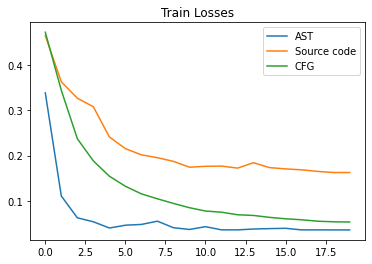

In [41]:

import matplotlib.pyplot as plt
plt.plot(list(range(0, len(loss_ast))), loss_ast, label='AST')
plt.plot(list(range(0, len(loss_sr))), loss_sr, label='Source code')
plt.plot(list(range(0, len(loss_cfg))), loss_cfg, label='CFG')
plt.legend()
plt.title('Train Losses')
plt.show()
#Accuracy for cfg = 0.73